In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs

In [92]:
X,y = make_blobs(
                    n_samples=300,
                    n_features=2,
                    centers = 3,
                    cluster_std = 3,
                    shuffle = True
)

In [93]:
X.shape,y.shape

((300, 2), (300,))

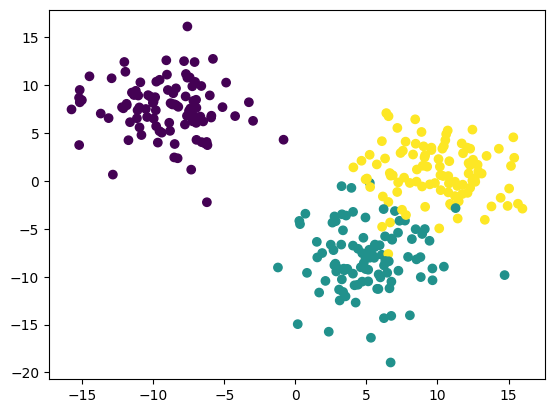

In [94]:
plt.scatter(
    x = X[:,0], # Always the X1
    y = X[:,1], # Always the X2
    c = y # The predicted value 
)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = 3
)

In [96]:
y_pred = aglc.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [97]:
silhouette_score(X,y_pred)

0.5925705775693483

In [99]:
davies_bouldin_score(X,y_pred)

0.5781049827800928

In [103]:
import scipy.cluster.hierarchy as sch

In [105]:
Z = sch.linkage(
    X,
    method = 'ward'
)

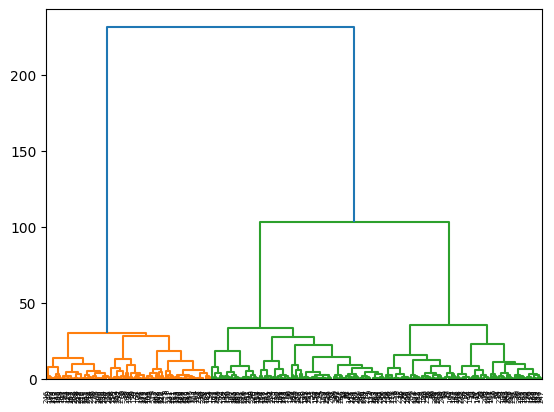

In [107]:
sch.dendrogram(
    Z
)
plt.show()